### Exploration on Insurrection Data
Exploration points
- Frequency of tweets/post: to compare the three sources and see how the discourse buildup in each
- See proportion of emotions before and after
- See growth of emotions and positive/negative wordcounts
- See top tweeting/posting accounts/subreddit/fb page

TODO: compile geo data and see discourse buildup on geo over time
do top accounts over time

In [1]:
import pandas as pd

fb_before_df = pd.read_csv (r'../facebook_before_insurrection.csv')
fb_after_df = pd.read_csv (r'../facebook_after_insurrection.csv')

fb_before_df = fb_before_df[fb_before_df['id'].notnull()]
fb_after_df = fb_after_df[fb_after_df['id'].notnull()]


#check table structure, add new date column
fb_before_df['date_column'] = pd.to_datetime(fb_before_df['created_at']).dt.date
fb_after_df['date_column'] = pd.to_datetime(fb_after_df['created_at']).dt.date
fb_before_df.head()

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion,date_column
0,1000506650214052020-12-30 12:28:33 EST,2020-12-30T17:28:33.000Z,#WeThePeople #Wednesday! It's 1776 in #America...,AvaAston,0.024356,0.801682,0.008161,0.085327,0.016259,0.007407,...,0.003704,0,0.000000,0.007407,0.000000,0.000000,0.011111,0.007407,anger,2020-12-30
1,1545535447284542020-12-29 19:40:17 EST,2020-12-30T00:40:17.000Z,Jan 6th DC is doing all they can to obstruct J...,WeThePeoplePowerToThePeople,0.006313,0.662385,0.006589,0.267558,0.011515,0.000000,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.018868,0.037736,anger,2020-12-30
2,3234786609961622020-12-30 06:03:47 EST,2020-12-30T11:03:47.000Z,#Constitution #January6 #PenceCard #VP ...,ToddHuffShow,0.024881,0.030911,0.009514,0.206930,0.017511,0.000000,...,0.023256,0,0.023256,0.116279,0.023256,0.000000,0.023256,0.023256,disgust,2020-12-30
3,3464930026717832020-12-29 22:44:13 EST,2020-12-30T03:44:13.000Z,Write your favorite or most blatant lie in the...,impracticalpolitics,0.008752,0.055451,0.011534,0.810325,0.009027,0.000000,...,0.065789,0,0.013158,0.052632,0.026316,0.013158,0.052632,0.078947,disgust,2020-12-30
4,16879183781279432020-12-30 08:48:20 EST,2020-12-30T13:48:20.000Z,🇺🇸🦅 Hey patriots Sorry for the delay in upda...,Patriotic Army of Deplorables,0.052600,0.004436,0.017669,0.026939,0.030055,0.000000,...,0.042105,0,0.010526,0.052632,0.010526,0.000000,0.063158,0.052632,joy,2020-12-30


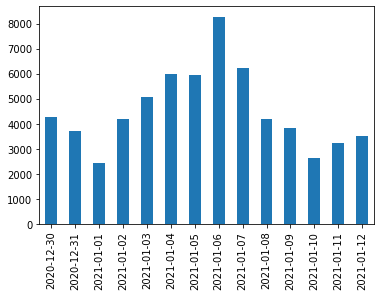

In [2]:
#check posting frequency
date_agg_before = fb_before_df['date_column'].value_counts(sort = False)
date_agg_after = fb_after_df['date_column'].value_counts(sort = False)

date_agg_all = date_agg_before.add(date_agg_after,fill_value=0)


date_plot = date_agg_all.plot(kind='bar')

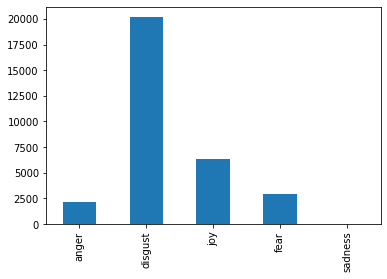

In [3]:
#check most common emotion before the insurrection

before_emotion_count = fb_before_df['highest_emotion'].value_counts(sort = False)
before_emotion_plot = before_emotion_count.plot(kind='bar')

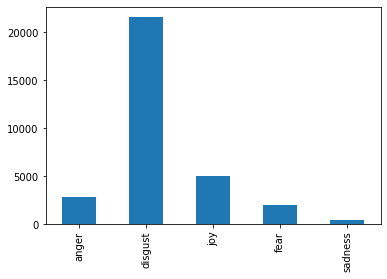

In [4]:
#check most common emotion after the insurrection

after_emotion_count = fb_after_df['highest_emotion'].value_counts(sort = False)
after_emotion_plot = after_emotion_count.plot(kind='bar')

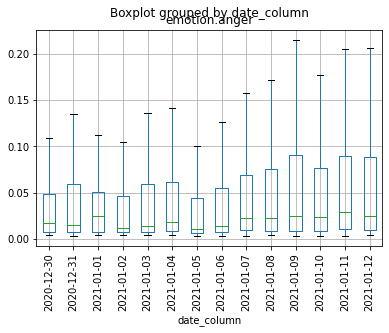

In [5]:
#check growth of each emotions per date

df_all_fb = [fb_after_df,fb_before_df]
df_all_fb = pd.concat(df_all_fb)


boxplot_anger = df_all_fb.boxplot(column='emotion.anger', by='date_column', return_type='axes', showfliers=False, rot=90)

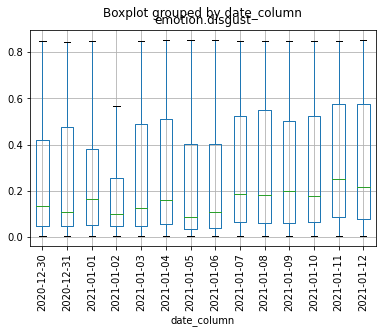

In [6]:
boxplot_disgust = df_all_fb.boxplot(column='emotion.disgust', by='date_column', return_type='axes', showfliers=False, rot=90)

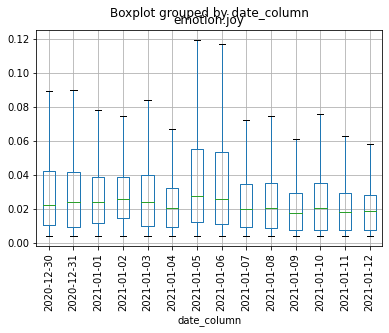

In [7]:
boxplot_joy = df_all_fb.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)

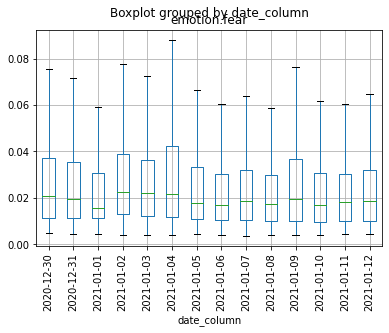

In [8]:
boxplot_fear = df_all_fb.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)

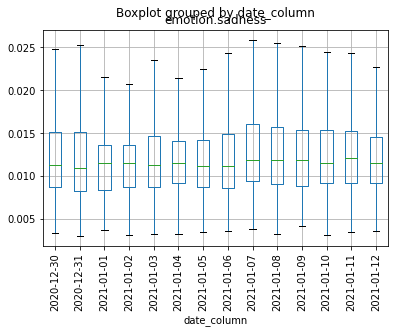

In [9]:
boxplot_sadness = df_all_fb.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

In [10]:
#most common tweeting account
df_all_fb['author_id'].value_counts().head()

United Conservatives For America      166
TrumpBookUSA                          123
Canadians against TRUMP !   :)  :)    119
Malcolm Nance Fans                    117
FOX NEWS with Tucker Carlson          117
Name: author_id, dtype: int64

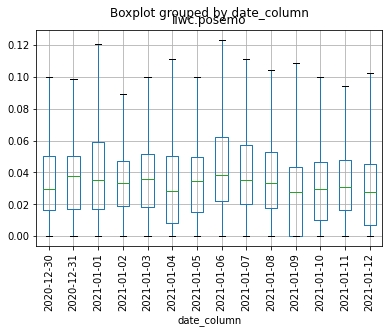

In [11]:
#occurrence of positive words
boxplot_positive = df_all_fb.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)

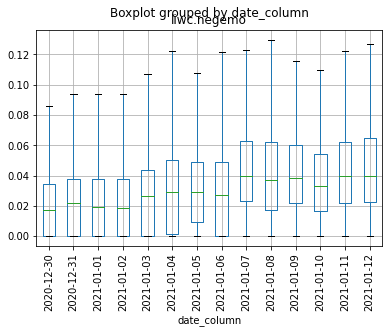

In [12]:
#occurrence of negative words
boxplot_positive = df_all_fb.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)

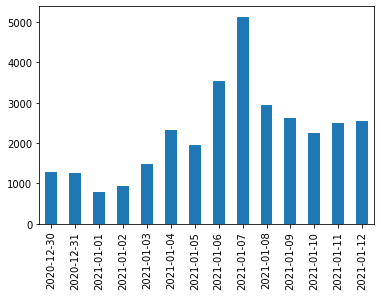

In [13]:
#check posting frequency (reddit)

rd_before_df = pd.read_csv (r'../reddit_before_insurrection.csv')
rd_after_df = pd.read_csv (r'../reddit_after_insurrection.csv')

rd_before_df = rd_before_df[rd_before_df['id'].notnull()]
rd_after_df = rd_after_df[rd_after_df['id'].notnull()]

df_all_rd = [rd_before_df,rd_after_df]
df_all_rd = pd.concat(df_all_rd)
df_all_rd['date_column'] = pd.to_datetime(df_all_rd['created_at']).dt.date
rd_freq = df_all_rd['date_column'].value_counts(sort = False)
date_plot = rd_freq.plot(kind='bar')


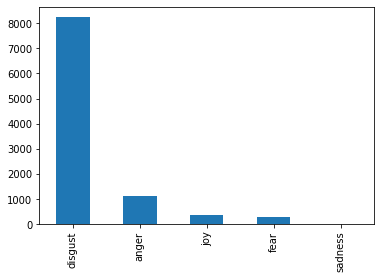

In [14]:
#check most common emotion before the insurrection

before_emotion_count_rd = rd_before_df['highest_emotion'].value_counts(sort = True)
before_emotion_plot_rd = before_emotion_count_rd.plot(kind='bar')

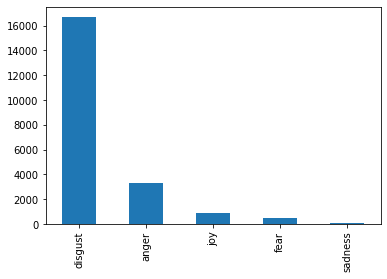

In [15]:
#check most common emotion after the insurrection

after_emotion_count_rd = rd_after_df['highest_emotion'].value_counts(sort = True)
after_emotion_plot_rd = after_emotion_count_rd.plot(kind='bar')

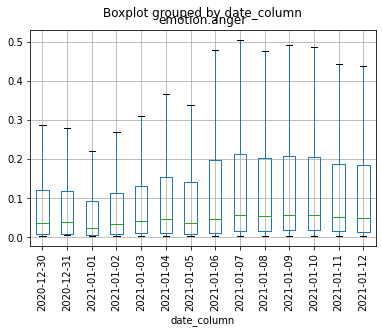

In [16]:
#check growth of each emotions per date (reddit)

boxplot_anger = df_all_rd.boxplot(column='emotion.anger', by='date_column', return_type='axes', showfliers=False, rot=90)

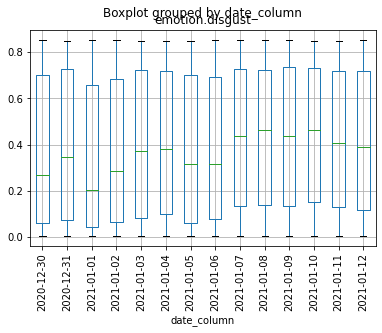

In [17]:
boxplot_disgust = df_all_rd.boxplot(column='emotion.disgust', by='date_column', return_type='axes', showfliers=False, rot=90)

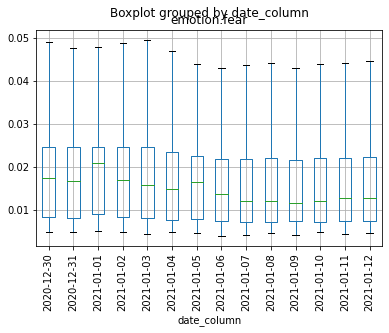

In [18]:
boxplot_fear = df_all_rd.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)

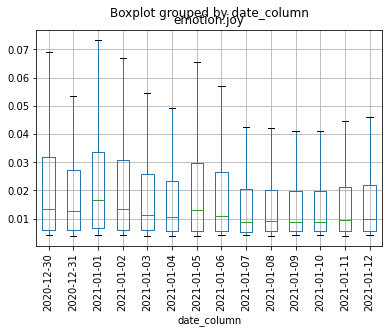

In [19]:
boxplot_joy = df_all_rd.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)

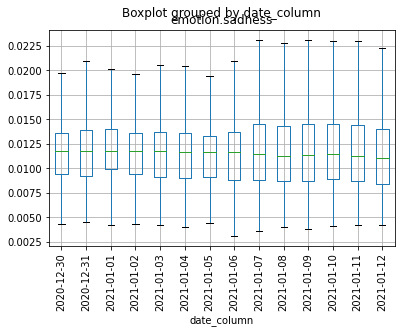

In [20]:
boxplot_sadness = df_all_rd.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

In [21]:
#most common subreddit
df_all_rd['subreddit']=df_all_rd['id'].str.split('/').str[2]
df_all_rd['subreddit'].value_counts().head()

politics                 6260
donaldtrump              2335
conspiracy               1488
news                      981
PoliticalCompassMemes     705
Name: subreddit, dtype: int64

In [22]:
df_all_rd.columns

Index(['id', 'created_at', 'text', 'author_id', 'emotion.joy', 'emotion.anger',
       'emotion.sadness', 'emotion.disgust', 'emotion.fear', 'liwc.focuspast',
       'liwc.focuspresent', 'liwc.focusfuture', 'liwc.posemo', 'liwc.negemo',
       'liwc.anx', 'liwc.anger', 'liwc.sad', 'liwc.family', 'liwc.friend',
       'liwc.female', 'liwc.male', 'liwc.social', 'liwc.affliation',
       'liwc.achieve', 'liwc.power', 'liwc.reward', 'liwc.risk', 'focus',
       'posneg', 'highest_emotion', 'date_column', 'subreddit'],
      dtype='object')

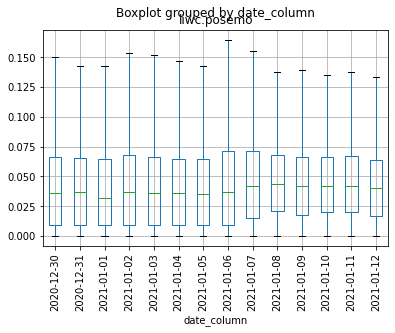

In [23]:
#occurrence of positive words
boxplot_positive = df_all_rd.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)

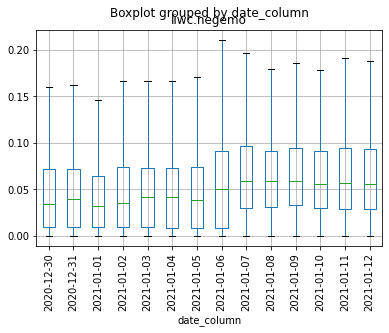

In [24]:
#occurrence of negative words
boxplot_negative = df_all_rd.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)

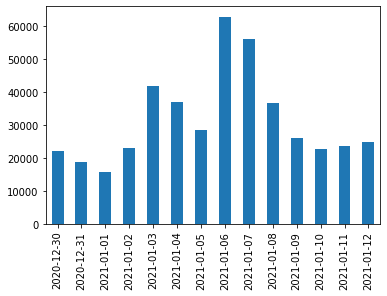

In [25]:
#check posting frequency (twitter)

tw_before_df = pd.read_csv (r'../twitter_before_insurrection.csv')
tw_after_df = pd.read_csv (r'../twitter_after_insurrection.csv')

tw_before_df = tw_before_df[tw_before_df['id'].notnull()]
tw_after_df  = tw_after_df[tw_after_df ['id'].notnull()]

df_all_tw = [tw_before_df,tw_after_df ]
df_all_tw = pd.concat(df_all_tw)
df_all_tw['date_column'] = pd.to_datetime(df_all_tw['created_at']).dt.date
tw_freq = df_all_tw['date_column'].value_counts(sort = False)
date_plot = tw_freq.plot(kind='bar')

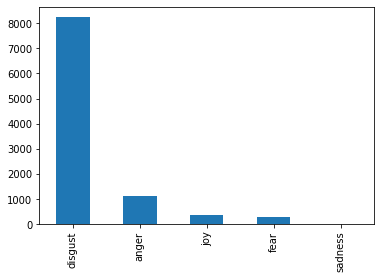

In [26]:
#check most common emotion before the insurrection

before_emotion_count_tw = tw_before_df['highest_emotion'].value_counts(sort = True)
before_emotion_plot_tw = before_emotion_count_rd.plot(kind='bar')

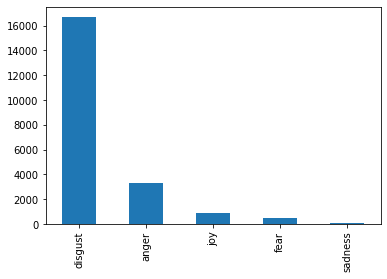

In [27]:
#check most common emotion after the insurrection

after_emotion_count_tw = tw_after_df['highest_emotion'].value_counts(sort = True)
after_emotion_plot_tw = after_emotion_count_rd.plot(kind='bar')

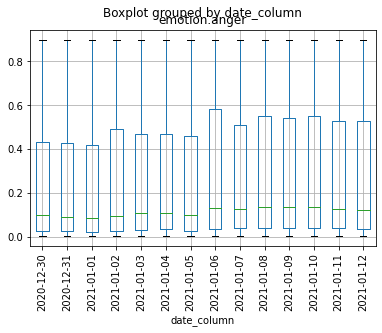

In [28]:
#check growth of each emotions per date (twitter)

boxplot_anger = df_all_tw.boxplot(column='emotion.anger', by='date_column', return_type='axes', showfliers=False, rot=90)

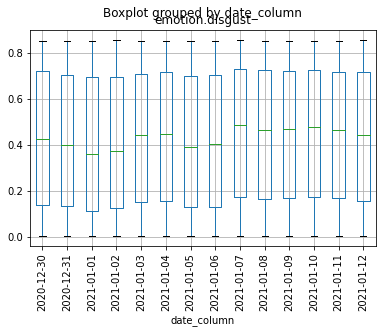

In [29]:
boxplot_disgust = df_all_tw.boxplot(column='emotion.disgust', by='date_column', return_type='axes', showfliers=False, rot=90)

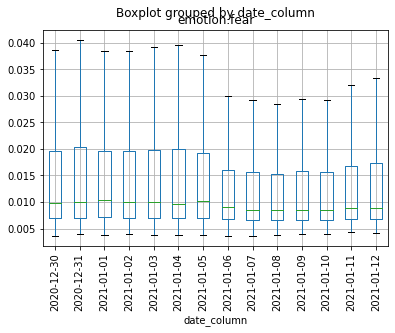

In [30]:
boxplot_fear = df_all_tw.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)

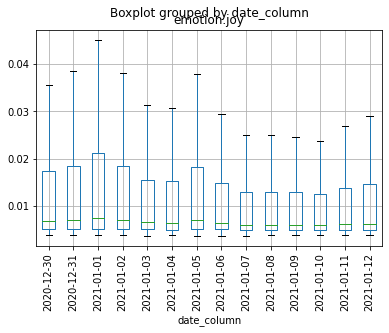

In [31]:
boxplot_joy = df_all_tw.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)

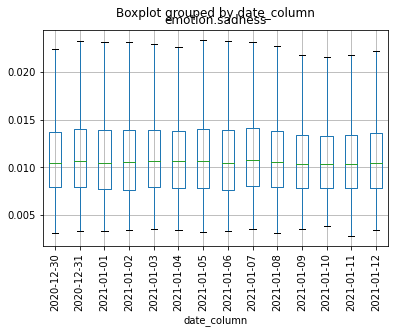

In [32]:
boxplot_sadness = df_all_tw.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

In [33]:
#most common twitter accounts
df_all_tw['author_id'].value_counts().head()



DarleneLewis100 (Darlene Lewis)            1023
Mary81245418 (Mary)                        1009
TonyHussein4 (Tony Hussein #Vaccinated)     598
APH48 (Albert P. Hernandez)                 467
Gtv_Luna (Luna 🇦🇺)                          449
Name: author_id, dtype: int64

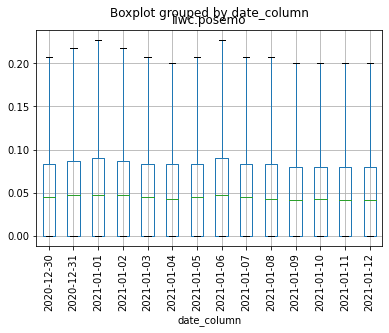

In [34]:
#occurrence of positive words
boxplot_positive = df_all_tw.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)

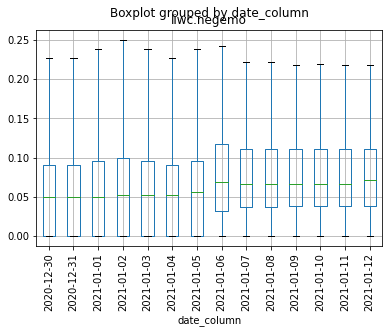

In [35]:
#occurrence of positive words
boxplot_negative = df_all_tw.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)